In [2]:
%matplotlib inline

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [33]:
df = pd.read_csv("~/code/thrill/build/precision_comparison")

In [34]:
df["relative_error"] = abs(df.hyperloglog_count / df.exact_count - 1)

In [35]:
df.head()

,hyperloglog_precision,samplesize,exact_count,hyperloglog_count,relative_error
0,4,10,10,11.51630,0.151630
1,4,10,10,8.72236,0.127764
2,4,10,10,10.72490,0.072490
3,4,10,10,10.72490,0.072490
4,4,10,10,12.41860,0.241860


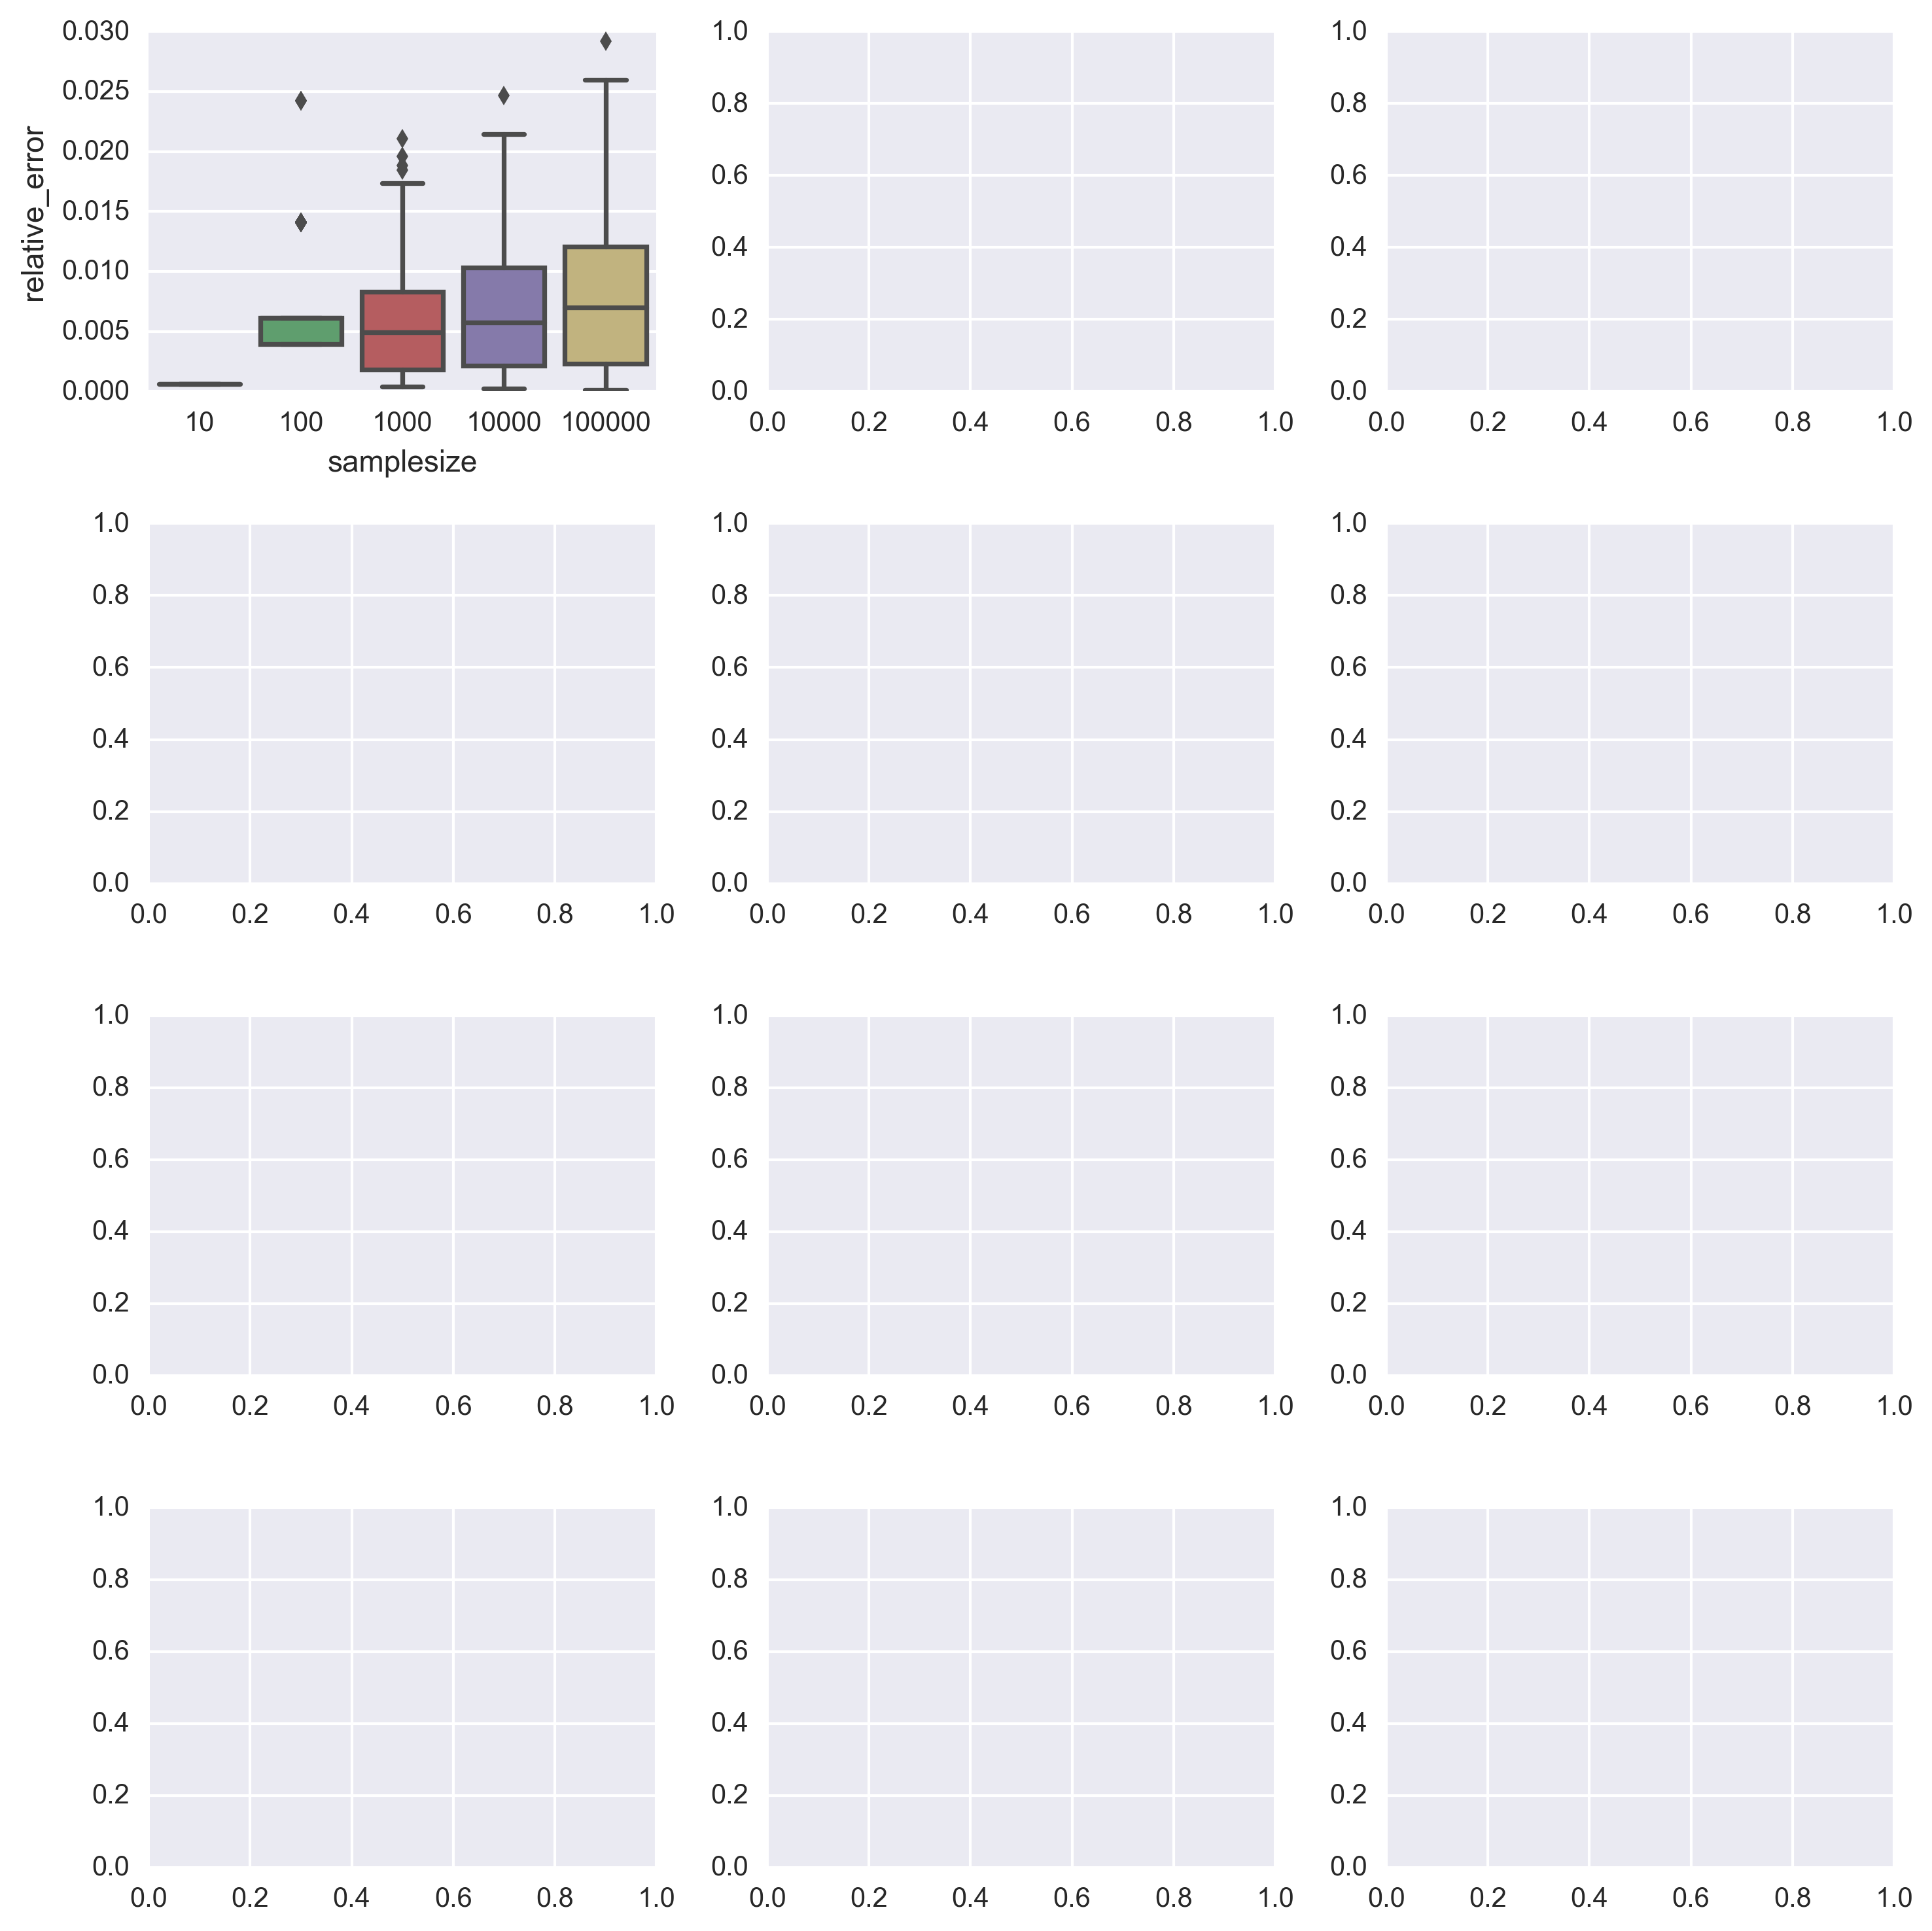

In [44]:
fig, axes = plt.subplots(math.ceil((15-4)/3.0),3,figsize=(10,10))
img = sns.boxplot(x='samplesize', y='relative_error', data=df[df.hyperloglog_precision == 4], ax=axes.flat[0])
    # axes.flat[i-4].set_title('Precision {}'.format(i))
fig.tight_layout()

In [9]:
df = pd.read_csv("~/code/thrill/build/single_precision")
df["relative_error"] = abs(df.hyperloglog_count / df.exact_count - 1)

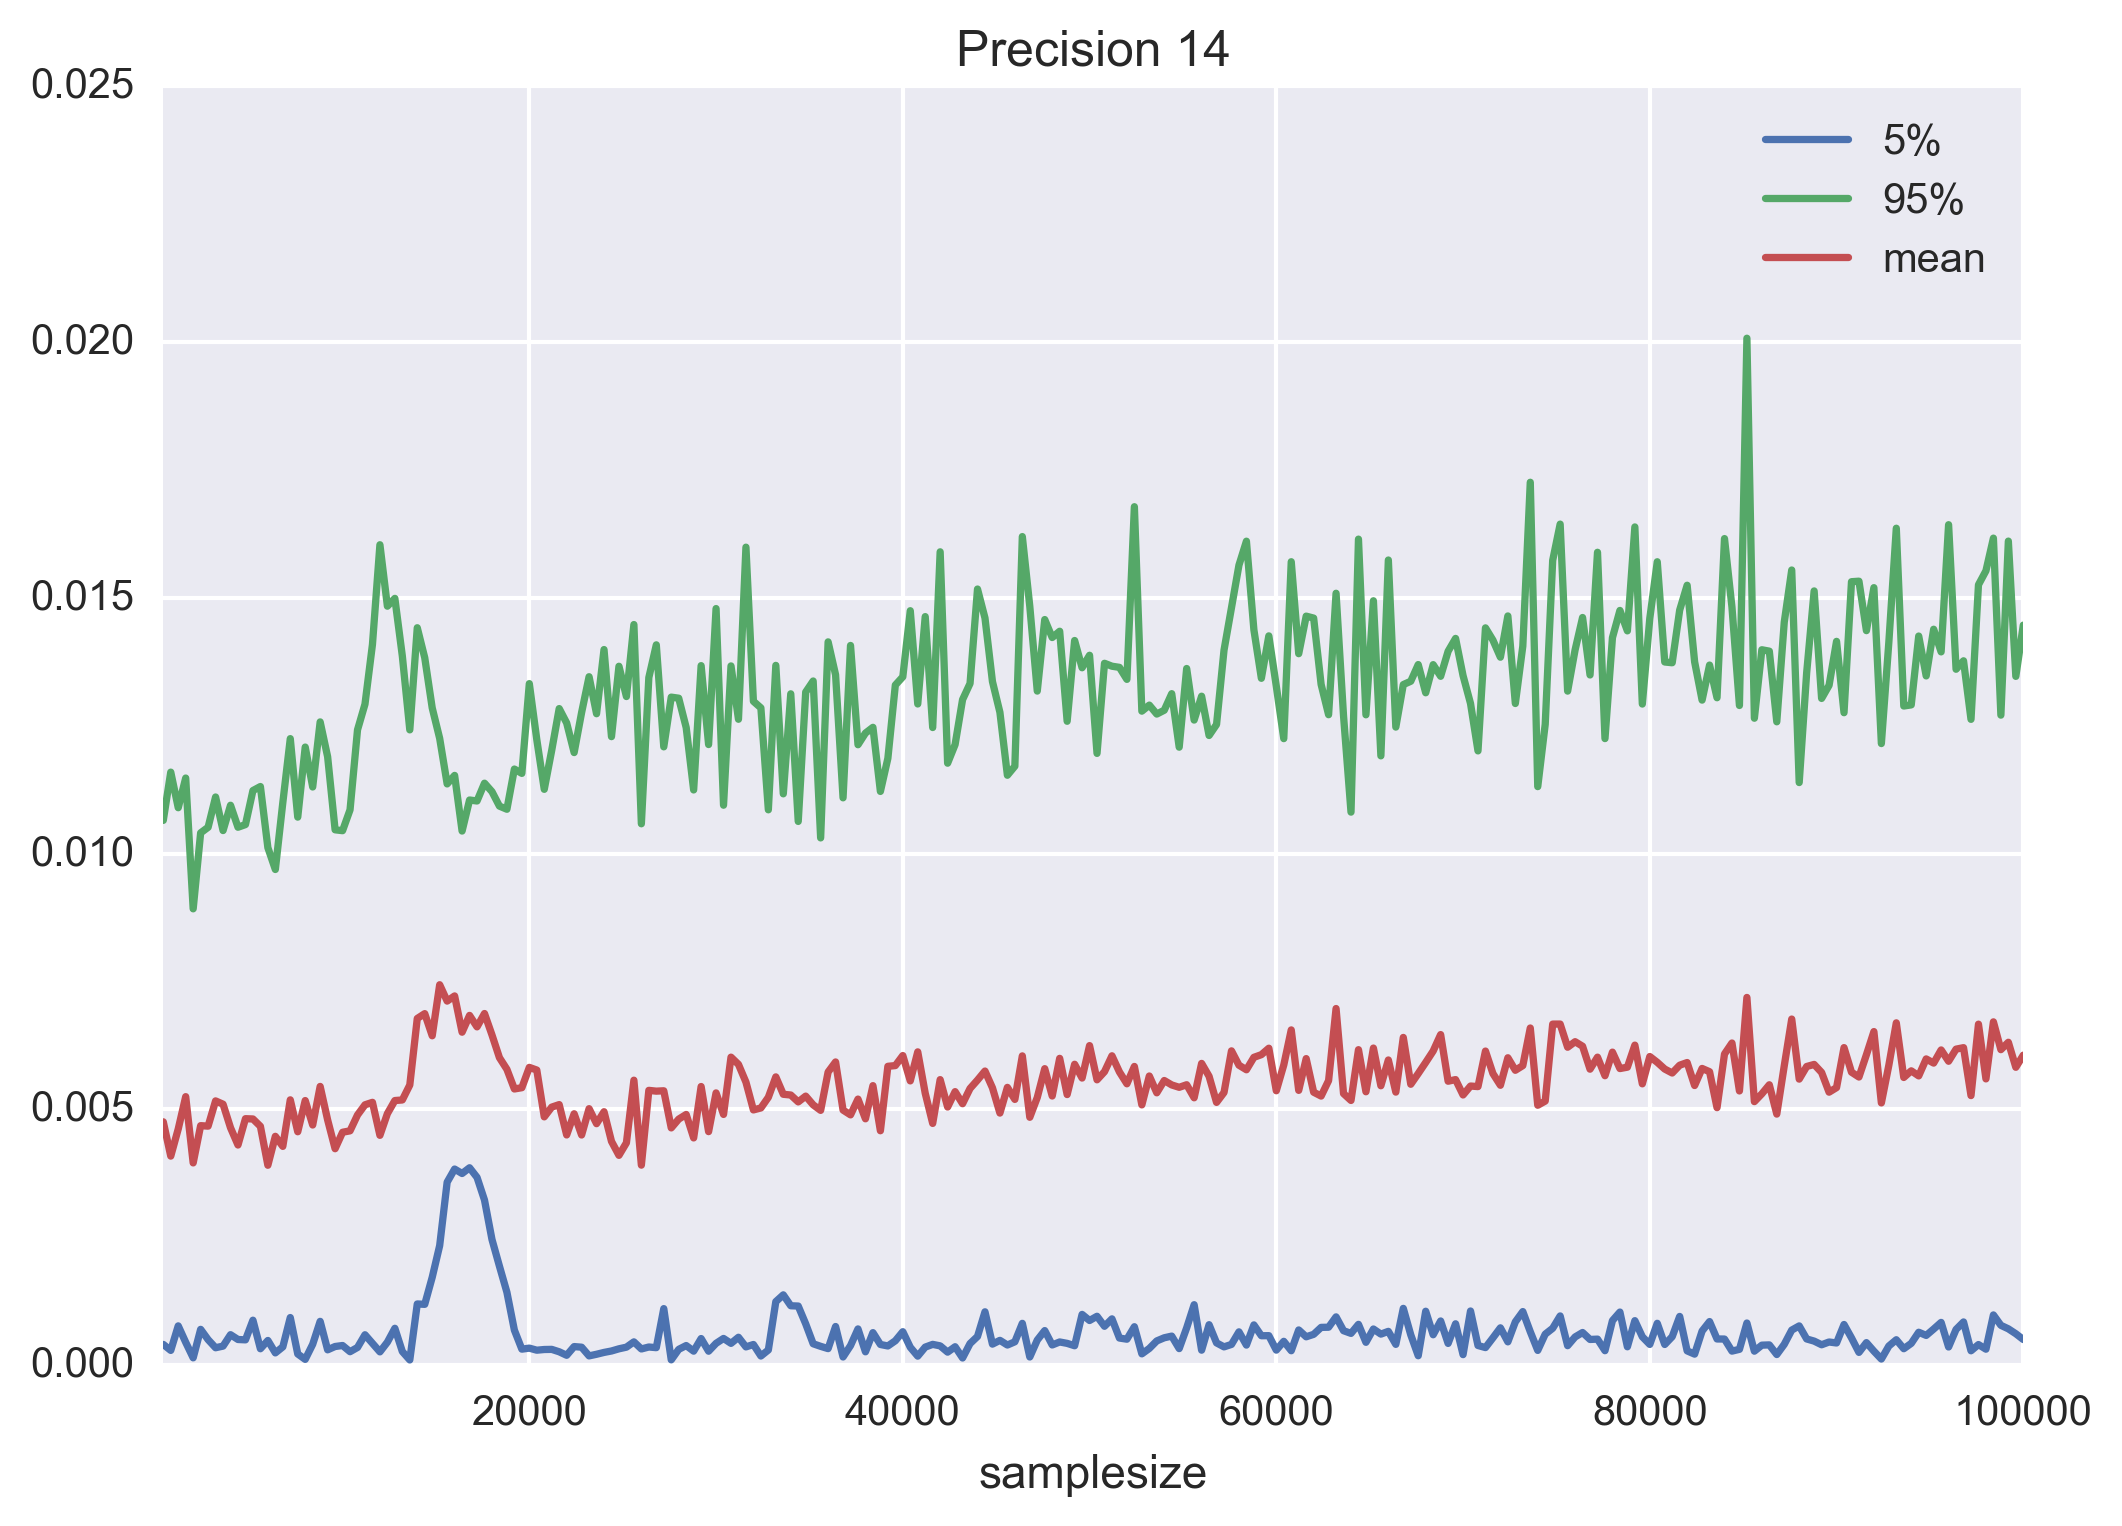

In [10]:
grouped = df.groupby("samplesize")
plotFrame = pd.DataFrame({
                          "5%": grouped.quantile(0.05)["relative_error"],
                          "mean": grouped.mean()["relative_error"],
                          "95%": grouped.quantile(0.95)["relative_error"]})
plotFrame.plot(title="Precision 14")